# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">ANALYSE DE LA PERSONNALITE DES CLIENTS</p>

<center>
    <img src="accueil.jpg">
</center>

Dans ce projet, Nous allons faire un regroupement non supervisé de données sur les dossiers des clients à partir de la base de données d'une entreprise d'épicerie. La segmentation des clients est la pratique consistant à séparer les clients en groupes qui reflètent les similitudes entre les clients de chaque cluster. Nous allons diviser les clients en segments pour optimiser l'importance de chaque client pour l'entreprise. Modifier les produits en fonction des besoins et des comportements distincts des clients. Cela aide également l'entreprise à répondre aux préoccupations des différents types de clients.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SOMMAIRE</p>   
    
* [1. IMPORTATION DES PACKAGES](#1)
    
* [2. EXPLORATION DES DONNEES](#2)  
    
* [3. PREPROCESSING](#3)   
    
* [4. REDUCTION DE LA DIMENSIONALITE](#4) 
      
* [5. CLUSTERING](#5)
    
* [6. EVALUATION DE MODELS](#6)
    
* [7. PROFILING](#7)
    
* [8. CONCLUSION](#8)
    
* [9. FIN](#9)


<a id="1"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">IMPORTATION DES PACKAGES</p>

In [1]:
%matplotlib inline 
# %matplotlib tk
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<a id="2"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">LECTURE DES DONNEES</p>

In [2]:
#Loading the dataset
data = pd.read_csv("marketing_campaign.csv", sep="\t")
# data = pd.set_option('display.max_columns',29)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
np.unique(data["AcceptedCmp3"])

array([0, 1], dtype=int64)

In [4]:
data.shape

(2240, 29)

<!-- <img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.png?raw=true"> -->



<a id="3"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">EXPLORATION DES DONNEES</p>


In [5]:
# Information sur les donnees
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# for i in data.columns:
#     print("Column : ",i)
#     print("\n")
#     print(data[i].isna().sum())
#     print("\n")

* Il manque des valeurs dans le revenu
* Dt_Customer qui indique la date à laquelle un client a rejoint la base de données n'est pas analysé comme DateTime
* Il y a quelques caractéristiques catégorielles dans notre base de données ; car il y a quelques fonctionnalités dans dtype: object). Nous devrons donc les encoder sous forme numérique plus tard.
Nour les valeurs manquantes, on va simplement supprimer les lignes qui ont des valeurs de revenu manquantes.

In [7]:
data = data.dropna()
len(data)

2216

Dans l'étape suivante, on va  créer une fonctionnalité à partir de **"Dt_Customer"** qui indique le nombre de jours pendant lesquels un client est enregistré dans la base de données de l'entreprise. Cependant, afin de rester simple, on prends cette valeur par rapport au client le plus récent dans l'enregistrement.

Ainsi, pour obtenir les valeurs, on doit vérifier les dates enregistrées les plus récentes et les plus anciennes.

In [8]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates du client enregistré le plus récent et le plus ancien
print("La date d'inscription du client le plus récent est le:",max(dates))
print("La date d'inscription du client le plus ancien est le:",min(dates))


La date d'inscription du client le plus récent est le: 2014-12-06
La date d'inscription du client le plus ancien est le: 2012-01-08


Création d'une fonctionnalité ("Customer_For") du nombre de jours pendant lesquels les clients ont commencé à magasiner dans le magasin par rapport à la dernière date enregistrée

In [9]:
days = []
d1 = max(dates) 
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [10]:
# 971*24*3600000

In [11]:
# data["Customer_For"]

Nous allons maintenant explorer les valeurs uniques dans les caractéristiques catégorielles pour avoir une idée claire des données  

In [12]:
print("Total des catégories dans feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total des catégories dans feature Education:\n", data["Education"].value_counts())

Total des catégories dans feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total des catégories dans feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64



<!-- * Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, I will create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features -->

In [13]:
#Feature Engineering
#Age du client 
data["Age"] = 2014-data["Year_Birth"]

#Dépenses totales pour divers articles
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Dérivation de la situation de vie selon l'état civil "Seul"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#le nombre total d'enfants vivant dans le ménage
data["Children"]=data["Kidhome"]+data["Teenhome"]

#le nombre total de membres du foyer
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#la parentalité
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#niveaux d'éducation en trois groupes
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#plus de clarté
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Suppression de certaines des fonctionnalités redondantes
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

Maintenant que nous avons de nouvelles fonctionnalités, regardons les statistiques des données.

In [14]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,45.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,18.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,37.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,44.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,55.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,121.000000,2525.000000,3.000000,5.000000,1.000000


Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

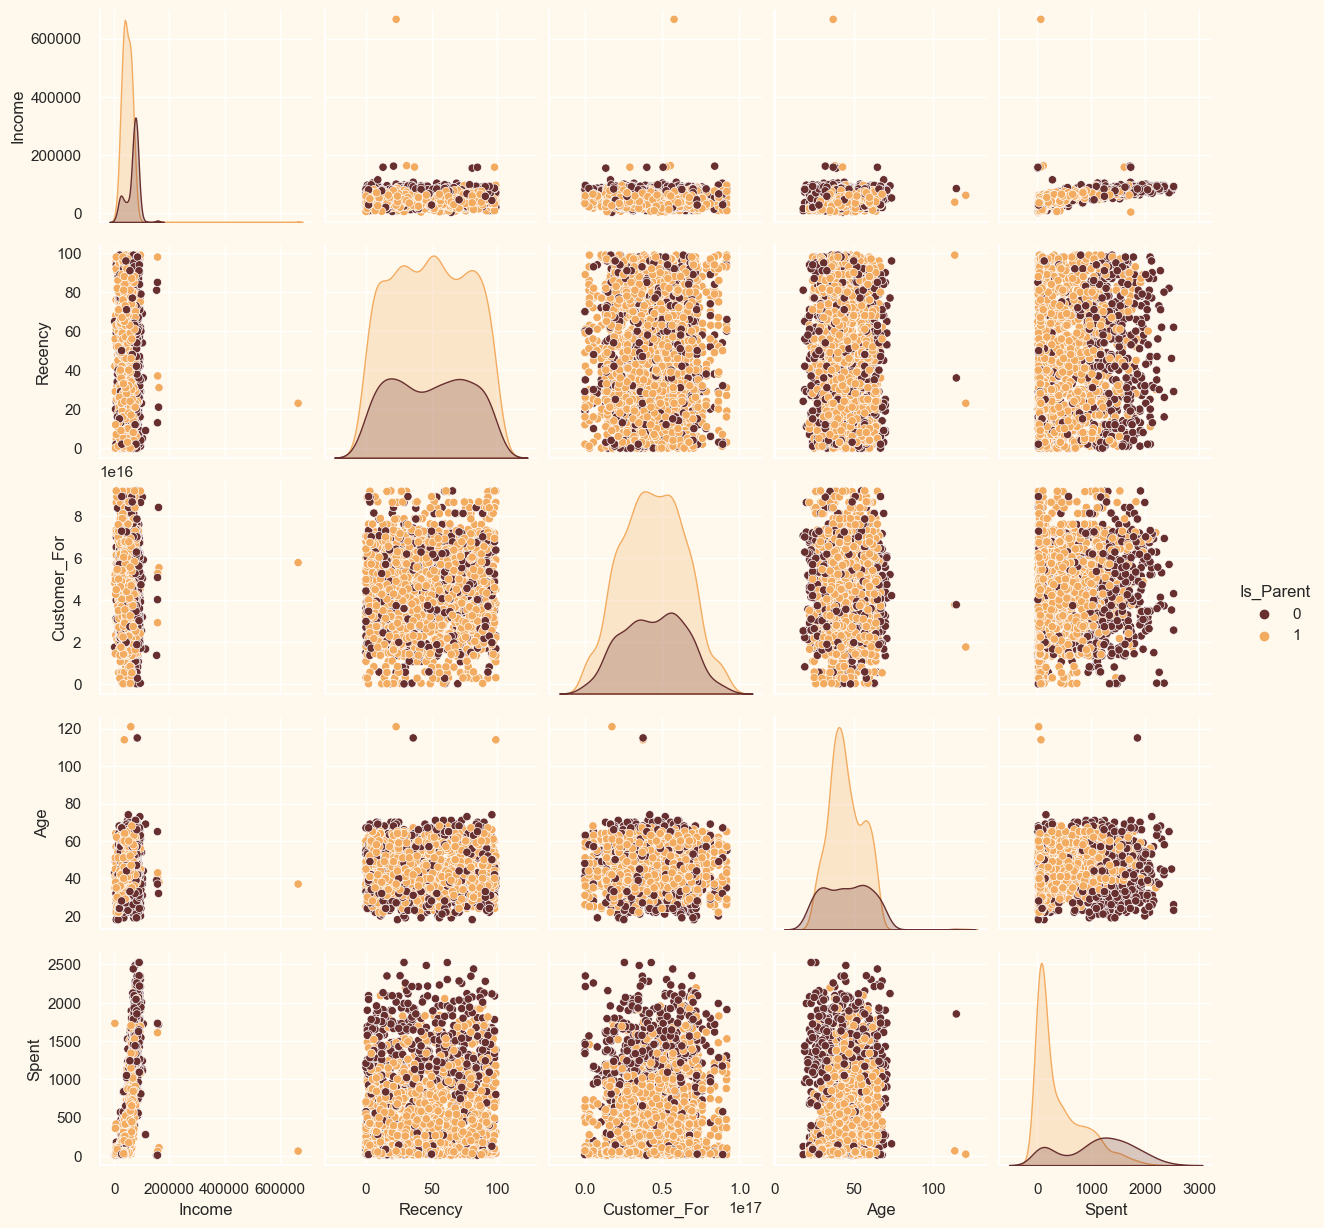

In [15]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [16]:
#valeurs aberrantes dans les caractéristiques du revenu et de l'âge.. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
#print("The total number of data-points after removing the outliers are:", len(data))

<AxesSubplot: >

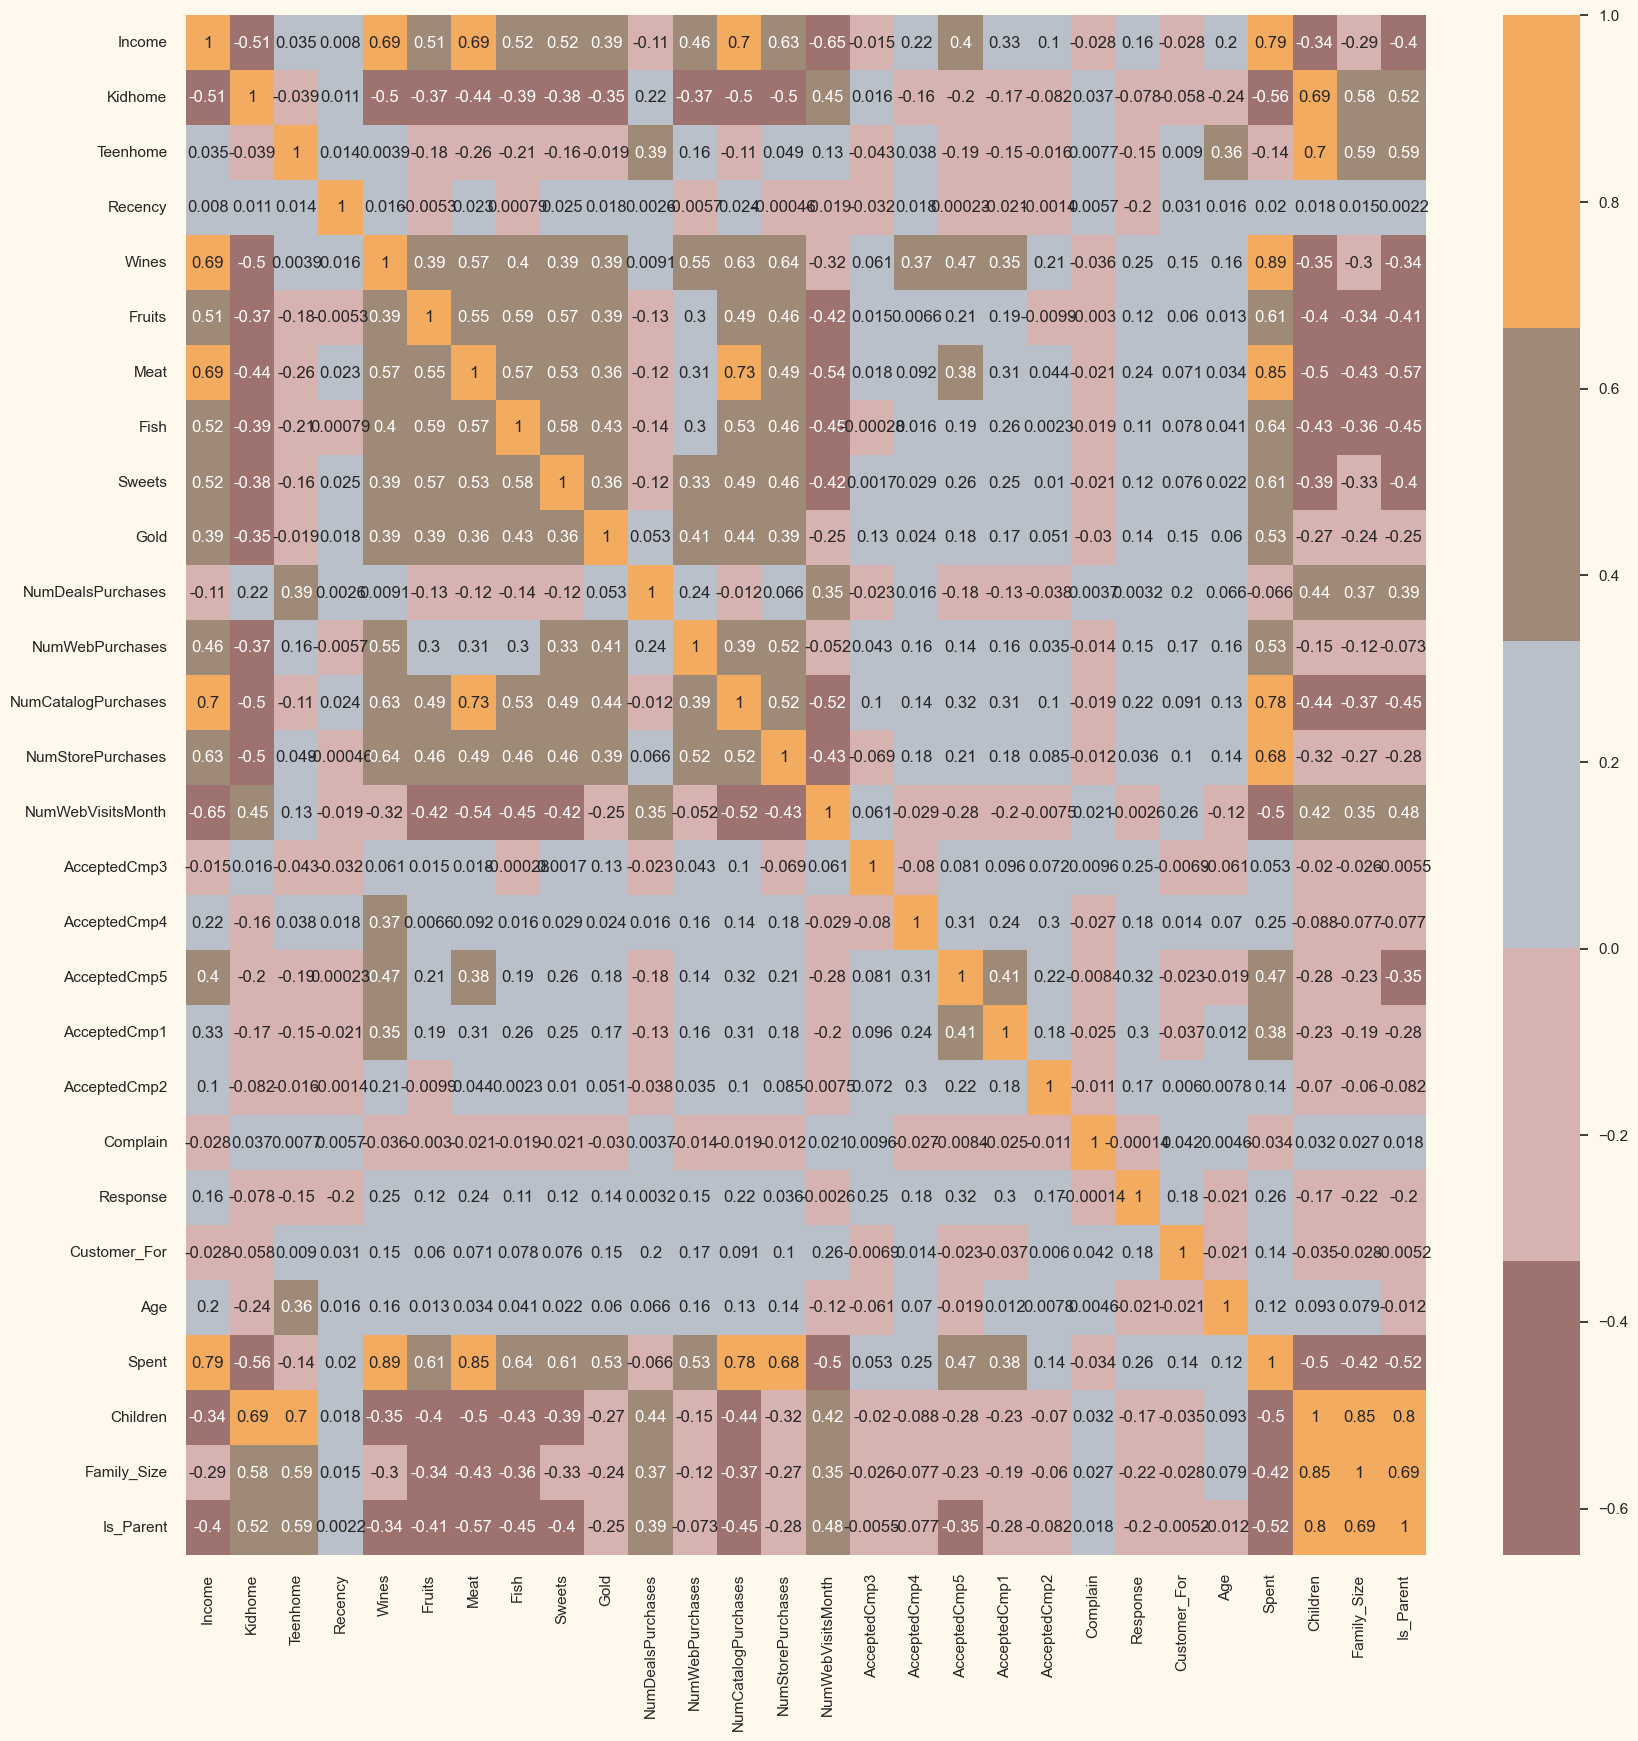

In [17]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

<a id="4"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">PREPROCESSING</p>

**Etapes pour le traitement des donnees:**

* Encoder les caractéristiques catégorielles
* Mise à l'échelle des fonctionnalités à l'aide du scaler standard
* Création d'un sous-ensemble de données pour la réduction de la dimensionnalité

In [18]:
#Les valeurs catégorielles
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Voici les Valeurs catégorielles :", object_cols)

Voici les Valeurs catégorielles : ['Education', 'Living_With']


In [19]:
#Encoder valeurs catégorielles
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    

In [20]:
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [21]:
#Données mises à l'échelle à utiliser pour réduire la dimensionnalité
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<a id="5"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">REDUCTION DE LA DIMENSIONALITE</p>
Dans ce problème, il existe de nombreux facteurs sur la base desquels la classification finale sera faite. Ces facteurs sont essentiellement des attributs ou des caractéristiques. Plus le nombre de fonctionnalités est élevé, plus il est difficile de travailler avec. Beaucoup de ces caractéristiques sont corrélées et donc redondantes. C'est pourquoi je vais effectuer une réduction de dimensionnalité sur les entités sélectionnées avant de les soumettre à un classificateur.
*La réduction de dimensionnalité est le processus de réduction du nombre de variables aléatoires considérées, en obtenant un ensemble de variables principales.* 

**Principal component analysis (PCA Analyse des composants principaux)** 
est une technique pour réduire la dimensionnalité de tels ensembles de données, augmentant l'interprétabilité mais en même temps minimisant la perte d'informations.

**Etape de cette Section:**
* Reduction de la dimentionalité avec PCA
* Tracer le Dataframe

**Reduction de la dimentionalité avec PCA**

Pour ce projet, On va réduire les dimensions à 3.

In [22]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,9.837419e-18,2.878377,-5.969394,-2.538494,-0.780421,2.383290,7.444305
col2,2212.0,-4.185922e-17,1.706839,-4.312196,-1.328316,-0.158123,1.242289,6.142721
col3,2212.0,3.202180e-17,1.221956,-3.530416,-0.829067,-0.022692,0.799895,6.611222


In [23]:
# pca.n_features_in_
# dir(pca)

In [24]:
pca.inverse_transform(pca.transform(scaled_ds)).shape

(2212, 23)

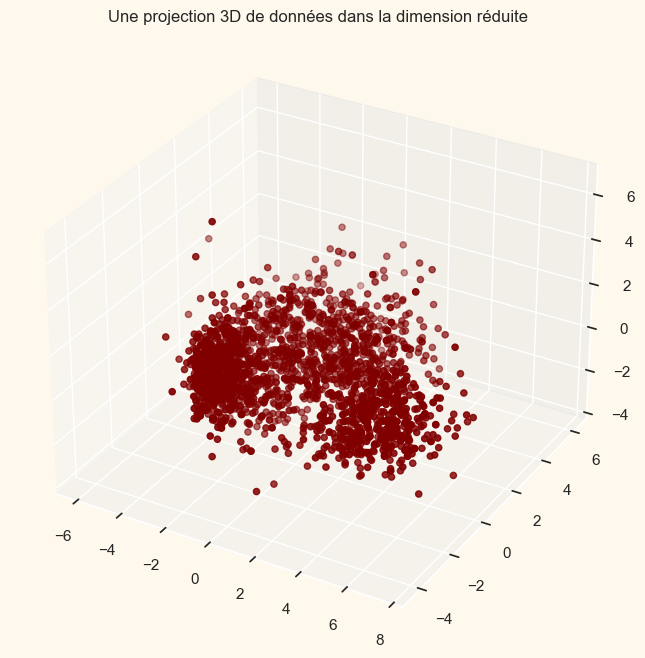

In [25]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("Une projection 3D de données dans la dimension réduite")
plt.show()

<a id="6"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

Maintenant qu'on a réduit les attributs à trois dimensions, on va effectuer un clustering via le clustering agglomératif. Le clustering agglomératif est une méthode de clustering hiérarchique. Cela implique de fusionner des exemples jusqu'à ce que le nombre de clusters souhaité soit atteint.

**Etape de clustering**
* Méthode Elbow pour déterminer le nombre de grappes à former
* Clustering via Agglomerative Clustering
* Examen des clusters formés via un nuage de points

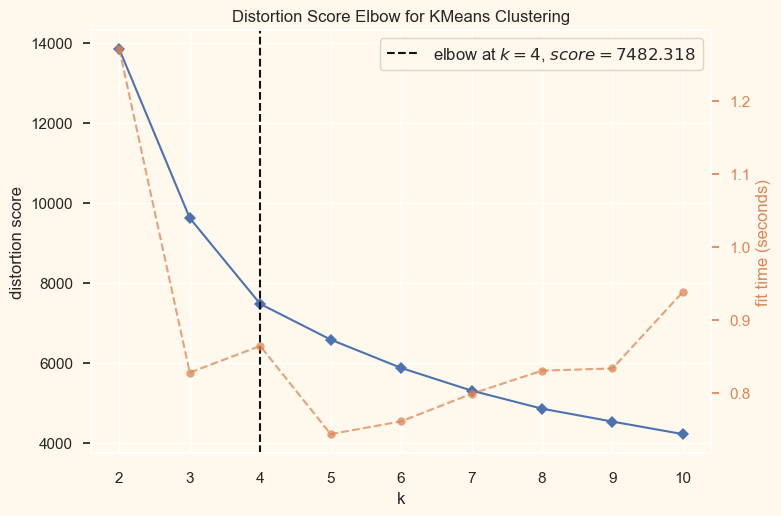

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# méthode du Elbow pour trouver le nombre de clusters à réaliser.
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

La cellule ci-dessus indique que quatre sera un nombre optimal de clusters pour ces données. 
Ensuite, nous ajusterons le modèle de clustering agglomératif pour obtenir les clusters finaux. 

In [27]:
#Initiations le modèle de clustering agglomératif
AC = AgglomerativeClustering(n_clusters=4)
# Nous allons ajuster le modèle et prédire les clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Ajout Clusters à la trame de données d'origine.
data["Clusters"]= yhat_AC

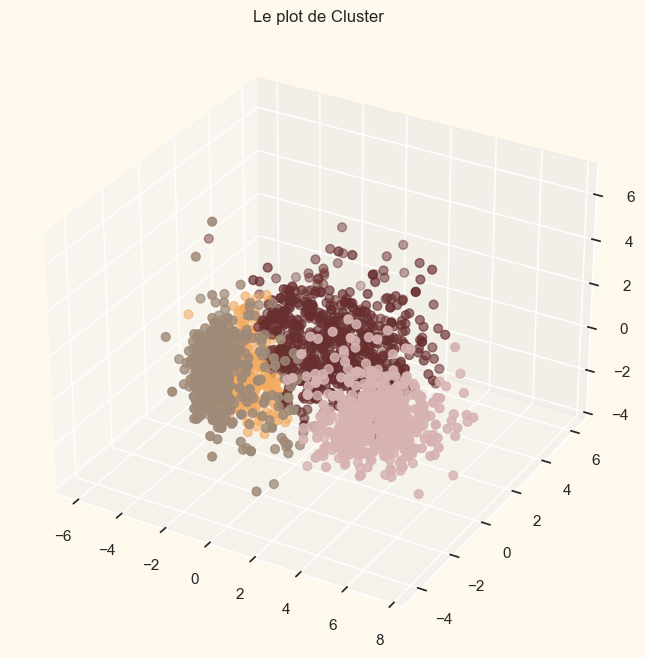

In [29]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("Le plot de Cluster")
plt.show()

<a id="7"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">EVALUATION DU MODEL</p>

Puisqu'il s'agit d'un clustering non supervisé. Nous n'avons pas de fonctionnalité balisée pour évaluer ou noter notre modèle. Le but de cette section est d'étudier les modèles dans les clusters formés et de déterminer la nature des modèles des clusters.

Pour cela, nous examinerons les données à la lumière des clusters via une analyse exploratoire des données et tirerons des conclusions. 

**Tout d'abord, regardons la distribution de groupe du clustering**

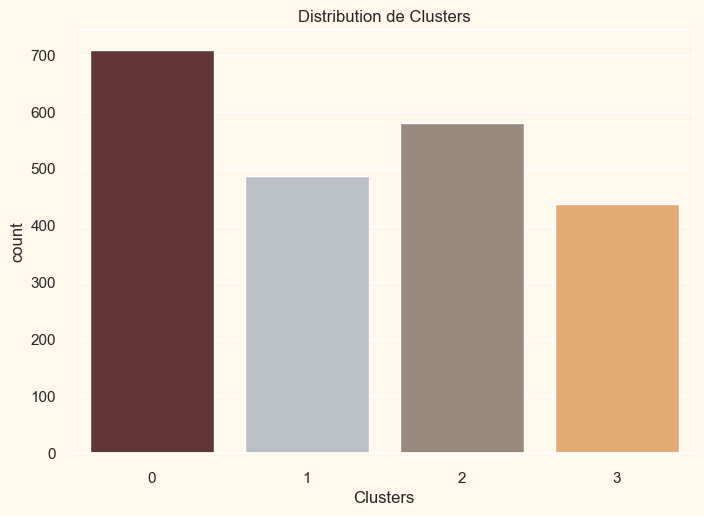

In [30]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution de Clusters")
plt.show()

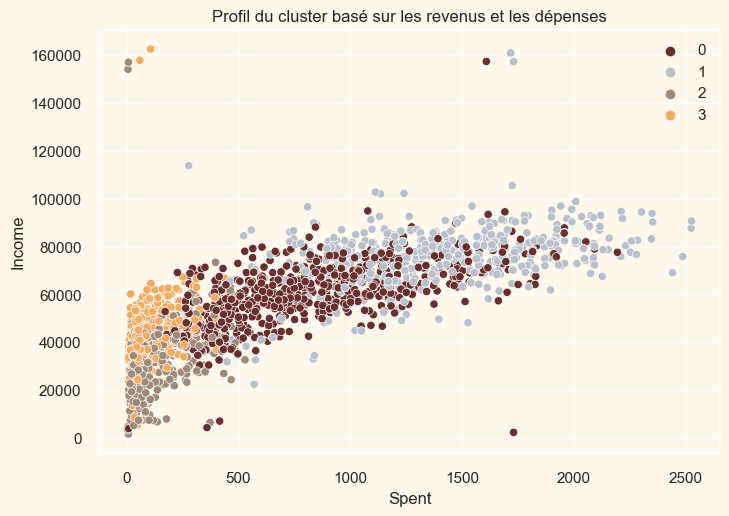

In [31]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title("Profil du cluster basé sur les revenus et les dépenses")
plt.legend()
plt.show()

**Le graphique des revenus par rapport aux dépenses montre le modèle de grappes**
* groupe 0 : dépenses élevées et revenu moyen
* groupe 1 : dépenses élevées et revenus élevés
* groupe 2 : faibles dépenses et faible revenu
* groupe 3 : dépenses élevées et faible revenu.


La distribution détaillée des clusters selon les différents produits dans les données.


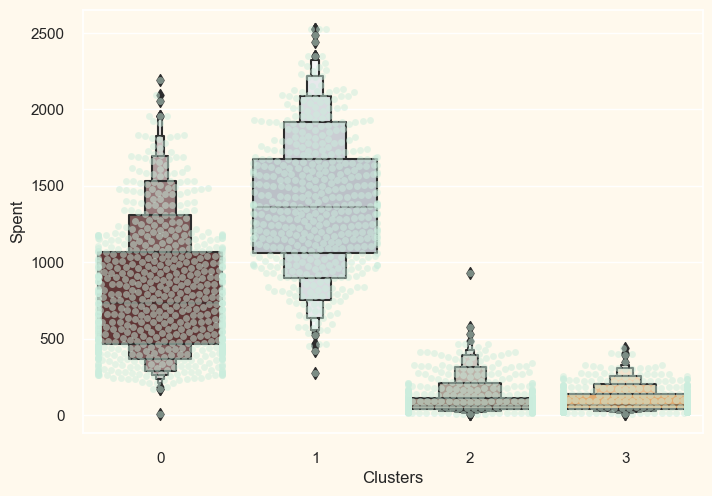

In [32]:
plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal)
plt.show()


D'après le graphique ci-dessus, on peut clairement voir que le groupe 3 est notre plus grand ensemble de clients, suivi de près par le groupe 0.
Nous pouvons explorer ce que chaque cluster dépense pour les stratégies de marketing ciblées.


Voyons ensuite comment nos campagnes ont fonctionné dans le passé.

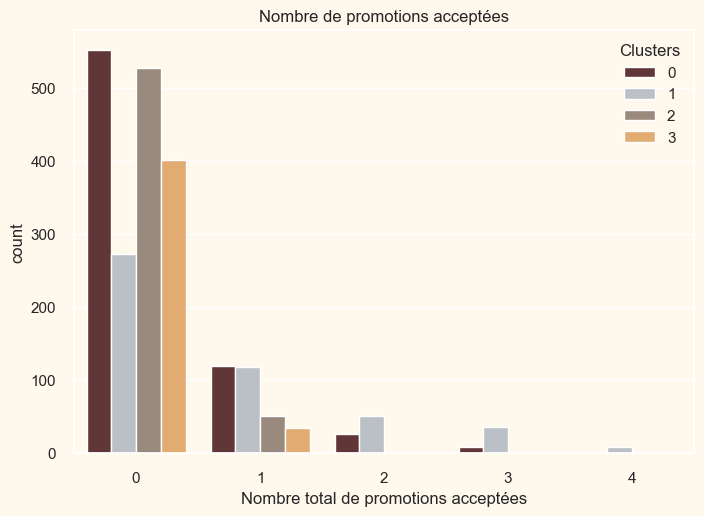

In [35]:
#Creer une feature pour obtenir une somme de promotions acceptées
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal)
pl.set_title("Nombre de promotions acceptées")
pl.set_xlabel("Nombre total de promotions acceptées")
plt.show()

Il n'y a pas eu de réponse écrasante aux campagnes jusqu'à présent. Très peu de participants dans l'ensemble. De plus, aucune partie ne prend dans les 5 d'entre eux. Peut-être que des campagnes mieux ciblées et bien planifiées sont nécessaires pour augmenter les ventes.

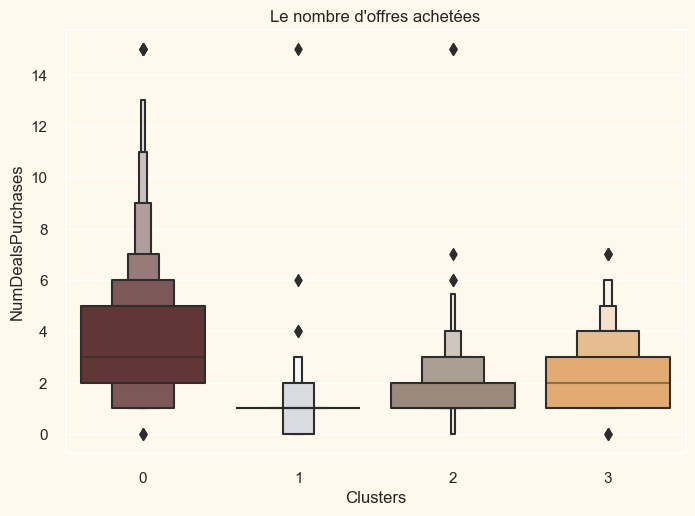

In [36]:
# Visualisons le nombre d'offres achetées
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal)
pl.set_title("Le nombre d'offres achetées")
plt.show()

Contrairement aux campagnes, les offres proposées ont bien fonctionné. Il a le meilleur résultat avec le cluster 0 et le cluster 3.
Cependant, notre groupe de clients vedettes 1 n'est pas très intéressé par les offres.
Rien ne semble attirer massivement le cluster 2

<Figure size 800x550 with 0 Axes>

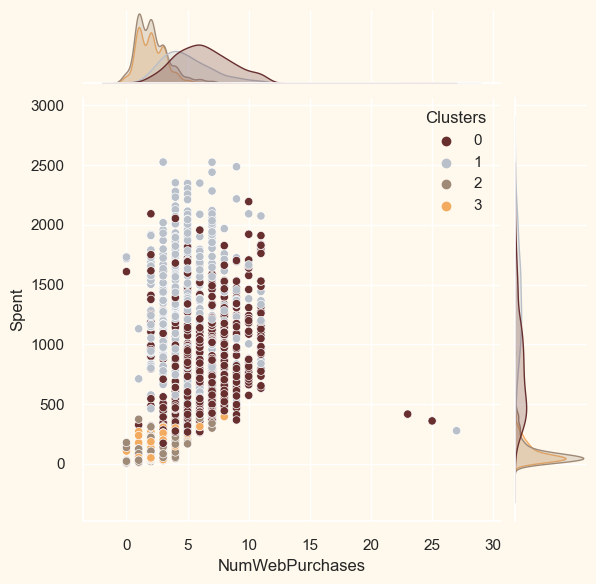

<Figure size 800x550 with 0 Axes>

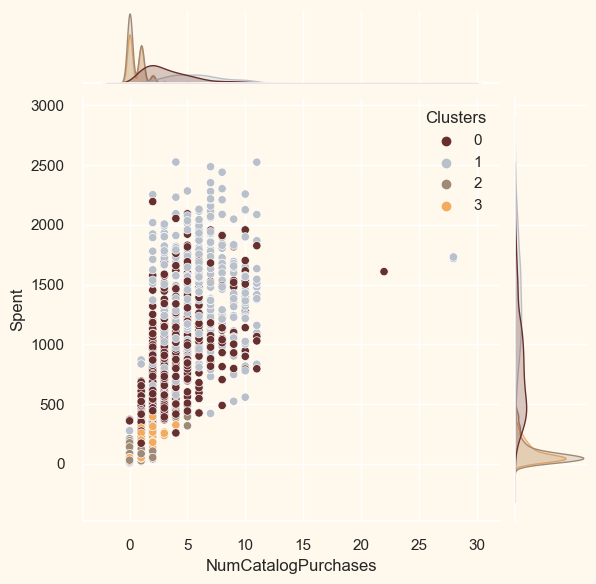

<Figure size 800x550 with 0 Axes>

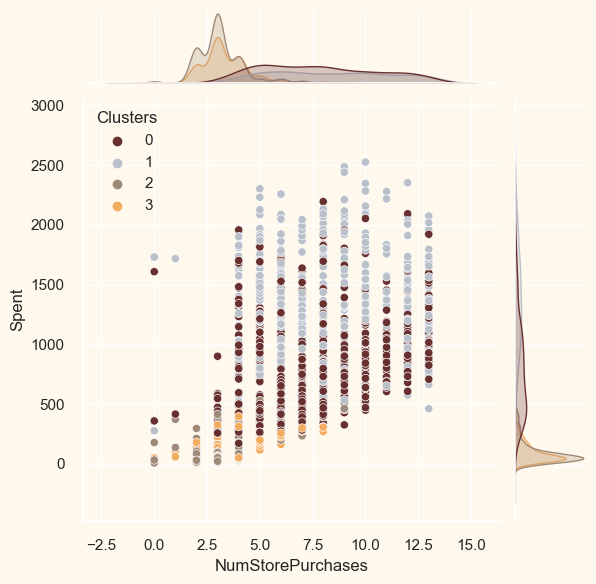

<Figure size 800x550 with 0 Axes>

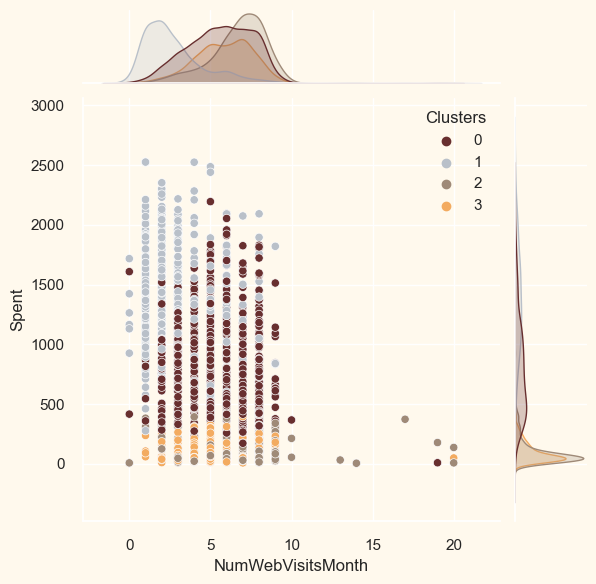

In [37]:
#Autre details
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=data[i],y = data["Spent"],hue=data["Clusters"], palette= pal)
    plt.show()

<a id="8"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">PROFILING</p>

Maintenant que nous avons formé les clusters et examiné leurs habitudes d'achat.
Voyons qui sont tous là dans ces pattern. Pour cela, nous établirons le profil des grappes formées et tirerons une conclusion sur qui est notre client vedette et qui a besoin de plus d'attention de la part de l'équipe marketing du magasin de détail.

Pour décider qu'on va tracer certaines des caractéristiques qui indiquent les traits personnels du client à la lumière du groupe dans lequel il se trouve.
Sur la base des résultats, on arrivera aux conclusions.

<Figure size 800x550 with 0 Axes>

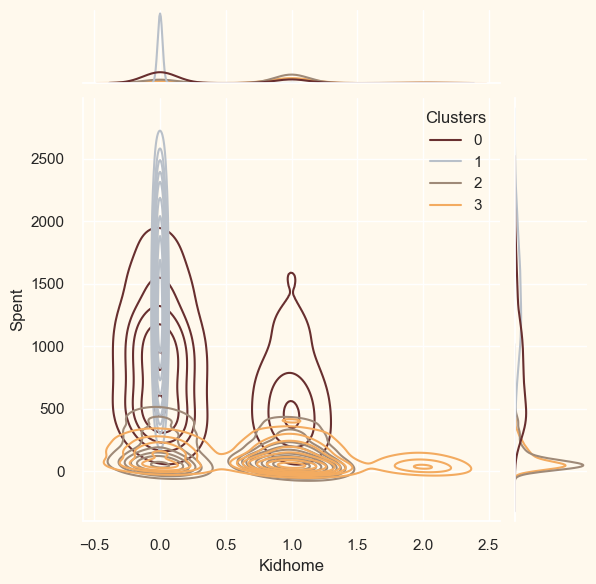

<Figure size 800x550 with 0 Axes>

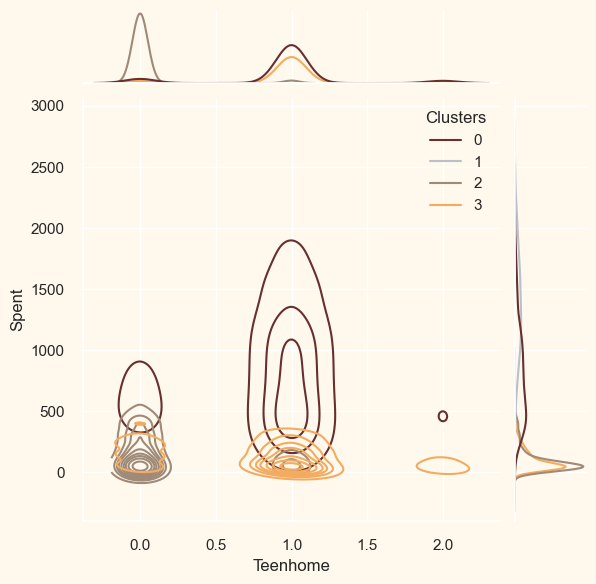

<Figure size 800x550 with 0 Axes>

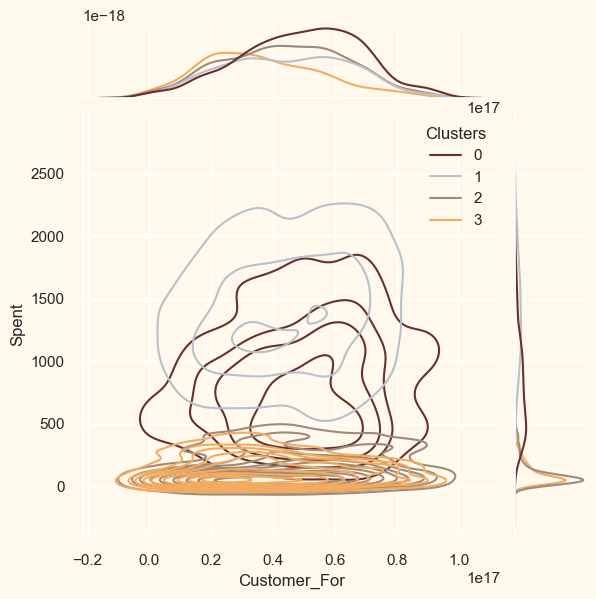

<Figure size 800x550 with 0 Axes>

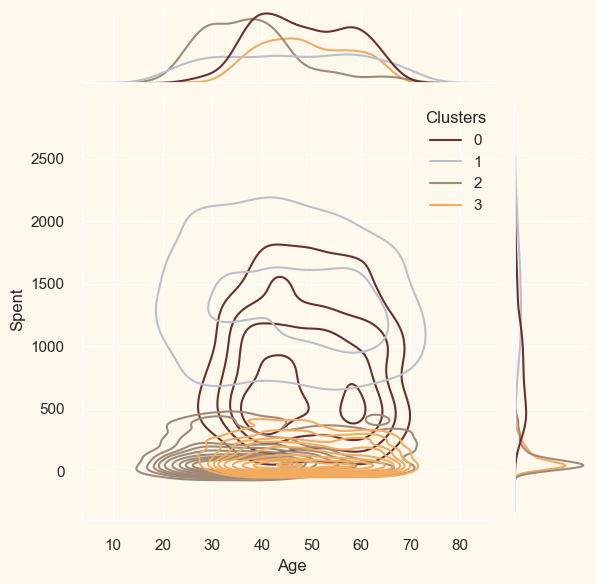

<Figure size 800x550 with 0 Axes>

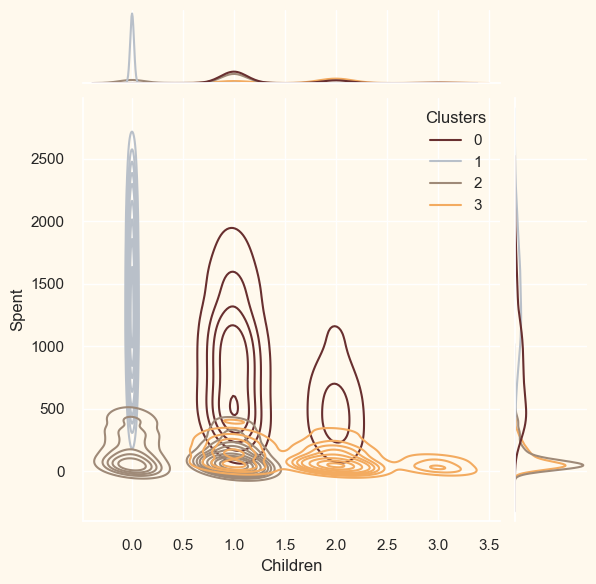

<Figure size 800x550 with 0 Axes>

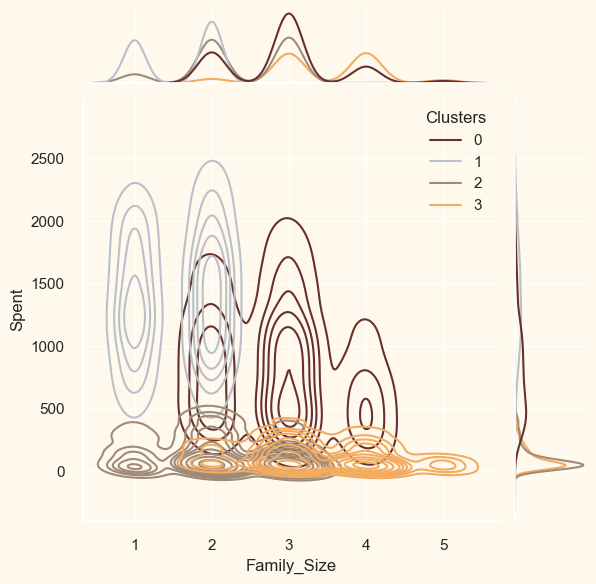

<Figure size 800x550 with 0 Axes>

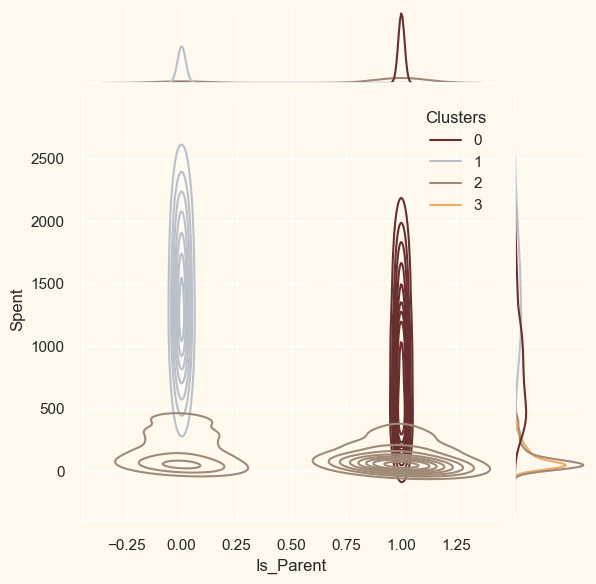

<Figure size 800x550 with 0 Axes>

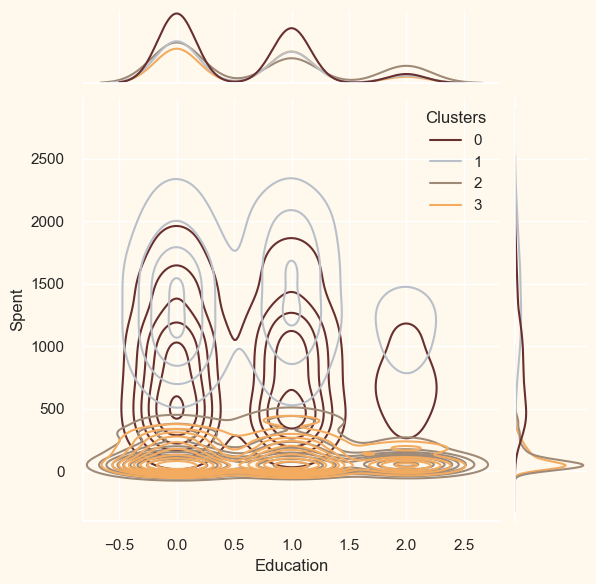

<Figure size 800x550 with 0 Axes>

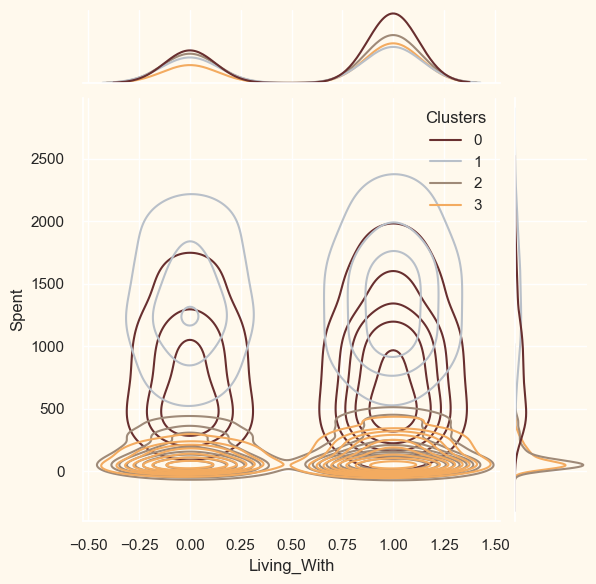

In [38]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=pal)
    plt.show()


<!-- **Points to be noted:**

The following information can be deduced about the customers in different clusters.

<img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation%20(3).png?raw=true"> -->
  

<a id="9"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

Dans ce projet, on a effectué un clustering non supervisé.
On a utilisé la réduction de dimensionnalité suivie d'un regroupement agglomératif.
On a trouvé 4 clusters et les ai ensuite utilisés pour profiler les clients des clusters en fonction de leurs structures familiales et de leurs revenus/dépenses.
Cela peut être utilisé pour planifier de meilleures stratégies de marketing. 

<a id="10"></a>
# <p style="background-color:#FF7F00;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">MERCI</p>